<a href="https://colab.research.google.com/github/rockahominy/Small-Projects/blob/main/chinchu__of_lab_mnist_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/fall2020/blob/master/lab_mnist_nn.ipynb">
<img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>


# Lab -- MNIST NN

Use Raschka's NeuralNetworkMLP (from scratch) with 8-by-8 digits and compare to KNN and Logistic regression

* [digits classification](https://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html) -- scikit-learn.org
* [ch12.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch12/ch12.ipynb) -- github

In [ ]:
# This is the digits classification problem from scikit-learn
# NOTE: Changed 0.9 to 0.8 in the train/test split
from sklearn import datasets, neighbors, linear_model

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()

n_samples = len(X_digits)

X_train = X_digits[:int(.8 * n_samples)] # changed from .9
y_train = y_digits[:int(.8 * n_samples)] # ditto
X_test = X_digits[int(.8 * n_samples):]  # ditto
y_test = y_digits[int(.8 * n_samples):]  # ditto

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression(max_iter=1000)

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.963889
LogisticRegression score: 0.902778


In [ ]:
  def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_examples, n_features]
            Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_examples]
            Predicted class labels.

        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

In [ ]:
# Load "neuralnet.py" directly from Raschka's github repo
from urllib.request import urlretrieve

url = "https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch12/neuralnet.py"
urlretrieve(url, 'neuralnet.py')

('neuralnet.py', <http.client.HTTPMessage at 0x7f2dba04fc18>)

In [ ]:
from neuralnet import NeuralNetMLP

In [ ]:
n_epochs = 1000
nn = NeuralNetMLP(n_hidden=100, 
                  l2=0.01, 
                  epochs=n_epochs, 
                  eta=0.0005,
                  minibatch_size=100, 
                  shuffle=True,
                  seed=1)

nn.fit(X_train=X_train, 
       y_train=y_train,
       X_valid=X_train,
       y_valid=y_train)


1000/1000 | Cost: 261.63 | Train/Valid Acc.: 98.61%/98.61% 

In [ ]:
import numpy as np
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred)
       .astype(np.float) / X_test.shape[0])

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 90.00%


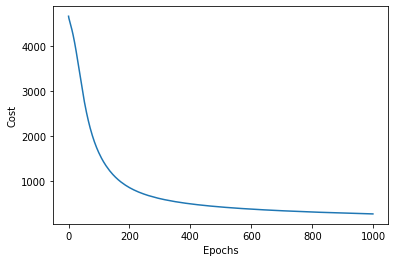

In [ ]:

import matplotlib.pyplot as plt


plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
#plt.savefig('images/12_07.png', dpi=300)
plt.show()

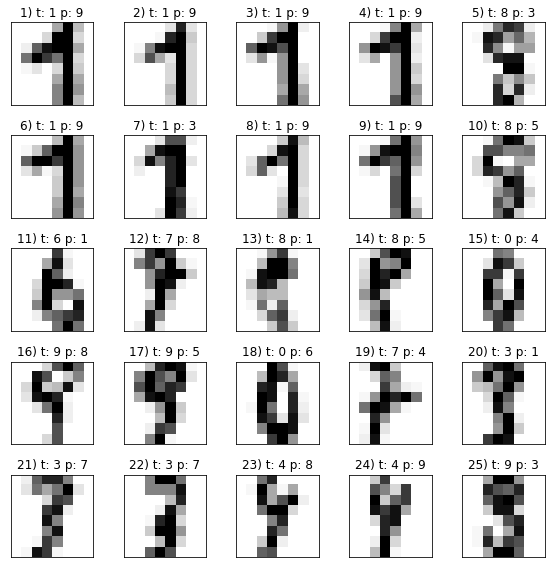

In [ ]:

miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(8,8))
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(8, 8)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
#plt.savefig('images/12_09.png', dpi=300)
plt.show()